In [4]:
# this is a code for testing the RL based Feature Selection method
from src.data.twomoon import Twomoon_synthetic
from src.model.rl import FeatureSelection
from src.model.new_try import FeatureSelection_Backward
import argparse
from src.data.datawrapper import DataWrapper
import numpy as np
from sklearn.model_selection import train_test_split
parser = argparse.ArgumentParser(description='RL based Feature Selection')
#parser.add_argument('--seed', type=int, default=12345, help='random seed')

parser.add_argument('--episode_number', type=int, default=10000, help='number of episodes')
parser.add_argument('--alpha', type=float, default=0.1, help='learning rate')
parser.add_argument('--gamma', type=float, default=0.3, help='discount factor')
parser.add_argument('--epsilon', type=float, default=0.1, help='epsilon greedy')
parser.add_argument('--predefined_reward', type=bool, default=False, help='predefined reward')
parser.add_argument('--correlation_loss_coefficient', type=float, default=0.01, help='correlation loss coefficient')
parser.add_argument('--datatype', type=str, default="arcene", help='arcene twomoon, spambase available')
parser.add_argument('--worsening_count', type=int, default=5, help='worsening count')   
args = parser.parse_args("")
X,Y=DataWrapper(args).get_data()

## Original result 

### 1. arcene

In [5]:
import json
# read json file
with open('results/arcene_predef_False_alpha_0.1_gamma_0.3_eps_0.1_cor_0.01.json') as json_file:
    data = json.load(json_file)


In [6]:
# SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


svc=SVC(kernel='rbf',C=5)

In [7]:

data['feature order']
top_1=data['feature order'][:1]
top_5=data['feature order'][:5]
top_10=data['feature order'][:10]
top_15=data['feature order'][:15]
top_20=data['feature order'][:20]
top_30=data['feature order'][:30]
top_50=data['feature order'][:50]
top_70=data['feature order'][:70]

top_100=data['feature order'][:100]
top_200=data['feature order'][:200]


origianl_acc=[]
for i in [top_1,top_5,top_10,top_15,top_20,top_30,top_50,top_70,top_100,top_200]:
    X_new=X[:,i]
    # 5fold cross validation
    acc_original_arcene=[]
    
    for j in range(500):
        X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=j)
        svc.fit(X_train,y_train)
        y_pred=svc.predict(X_test)
        acc_original_arcene.append(accuracy_score(y_test,y_pred))
    origianl_acc.append(np.mean(acc_original_arcene))

## Corrcoef result


In [8]:
import json
# read json file
with open('results/arcene_predef_True_alpha_0.1_gamma_0.3_eps_0.1_cor_0.01.json') as json_file:
    data_custom = json.load(json_file)

In [9]:

data_custom['feature order']
top_1=data_custom['feature order'][:1]
top_5=data_custom['feature order'][:5]
top_10=data_custom['feature order'][:10]
top_15=data_custom['feature order'][:15]
top_20=data_custom['feature order'][:20]
top_30=data_custom['feature order'][:30]
top_50=data_custom['feature order'][:50]
top_70=data_custom['feature order'][:70]
top_100=data_custom['feature order'][:100]


custom_acc=[]
for i in [top_1,top_5,top_10,top_15,top_20,top_30,top_50,top_70,top_100,top_200]:
    X_new=X[:,i]
    # 5fold cross validation
    acc_corr_loss=[]
    
    for j in range(500):
        X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=j)
        svc.fit(X_train,y_train)
        y_pred=svc.predict(X_test)
        acc_corr_loss.append(accuracy_score(y_test,y_pred))
    print(np.mean(acc_corr_loss))
    custom_acc.append(np.mean(acc_corr_loss))

0.6635666666666666
0.8127000000000001
0.8205333333333333
0.8659333333333334
0.8657666666666667
0.8774333333333334
0.8657333333333334
0.8778666666666666
0.8826666666666667
0.9005


In [10]:
origianl_acc

[0.6995,
 0.7941,
 0.8479333333333334,
 0.8653666666666668,
 0.8738333333333332,
 0.8816333333333332,
 0.8934666666666666,
 0.8947,
 0.8949000000000001,
 0.9005]

## BASELINE


In [13]:
idxs=np.random.choice(10000,i)

In [16]:
idxs.shape

(200,)

In [15]:
X_train.shape

(140, 10000)

In [17]:
# randomly select 1,5,10,15,20,30,50,70,100,200 features from 10000

random_acc=[]
for i in [1,5,10,15,20,30,50,70,100,200]:
    acc_random=[]
    for j in range(500):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=j)
        idxs=np.random.choice(10000,i)
        X_new=X_train[:,idxs]
        svc.fit(X_new,y_train)
        acc_random=svc.score(X_test[:,idxs],y_test)
    random_acc.append(np.mean(acc_random))

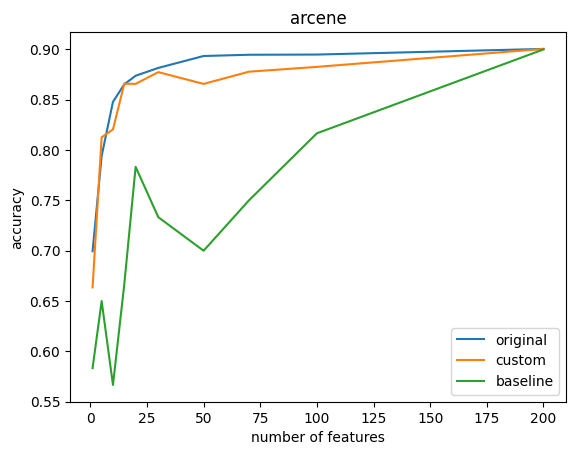

In [18]:
from matplotlib import pyplot as plt
plt.title('Arcene Dataset')
plt.plot([1,5,10,15,20,30,50,70,100,200],origianl_acc[:],label='original')
plt.plot([1,5,10,15,20,30,50,70,100,200],custom_acc[:],label='custom loss')
plt.plot([1,5,10,15,20,30,50,70,100,200],random_acc[:],label='baseline')
plt.xlabel('number of selected features')
plt.ylabel('accuracy')
plt.legend()